In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import cycle, islice

%matplotlib inline

In [2]:
entrenamiento_df = pd.read_csv('setDeDatos/nlp-getting-started/train.csv')

In [542]:
entrenamiento_df.head(10)

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1


In [543]:
entrenamiento_df.dtypes

id           int64
keyword     object
location    object
text        object
target       int64
dtype: object

In [544]:
entrenamiento_df['keyword'].value_counts().head(10)

fatalities     45
deluge         42
armageddon     42
harm           41
damage         41
body%20bags    41
sinking        41
evacuate       40
fear           40
siren          40
Name: keyword, dtype: int64

In [545]:
entrenamiento_df['location'].value_counts().head(10)

USA                104
New York            71
United States       50
London              45
Canada              29
Nigeria             28
UK                  27
Los Angeles, CA     26
India               24
Mumbai              22
Name: location, dtype: int64

In [546]:
entrenamiento_df['target'].value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [547]:
# Quito la columna 'text' y la reemplazo por la columna  
# 'longitud_text' que contiene la longitud de la columna 'text'. 
entrenamiento_df['text']=entrenamiento_df['text'].astype(str)
entrenamiento_df['longitud_text']=entrenamiento_df.text.str.len()
#entrenamiento_df=entrenamiento_df[['id','keyword','location','target','longitud_text']]
entrenamiento_df.head(10)


,id,keyword,location,text,target,longitud_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,69
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,38
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,133
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,65
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,88
5,8,NaN,NaN,#RockyFire Update => California Hwy. 20 closed...,1,110
6,10,NaN,NaN,#flood #disaster Heavy rain causes flash flood...,1,95
7,13,NaN,NaN,I'm on top of the hill and I can see a fire in...,1,59
8,14,NaN,NaN,There's an emergency evacuation happening now ...,1,79
9,15,NaN,NaN,I'm afraid that the tornado is coming to our a...,1,52


/home/gaston/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Densidad')

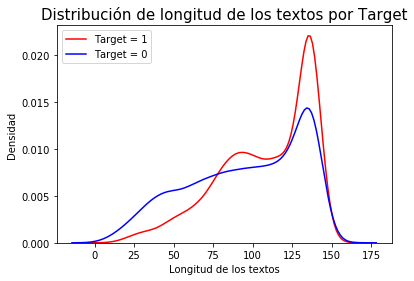

In [548]:
# hago un plot de la longitud de textos por target
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 1]['longitud_text'], color = 'red',hist=False, rug=False, label = 'Target = 1')
plot = sns.distplot(entrenamiento_df[entrenamiento_df['target']== 0]['longitud_text'], color = 'blue',hist=False, rug=False, label = 'Target = 0')

plot.set_title("Distribución de longitud de los textos por Target",size=15)
plot.set_xlabel('Longitud de los textos', size=10)
plot.set_ylabel('Densidad',size=10)


In [549]:
#agrupo por target y longitud del texto(promedio y cantidad). 
longitud_target = entrenamiento_df.loc[:,['longitud_text','target']].groupby('target')\
                .agg(['mean','count'])
longitud_target

longitud_text      
                mean count
target                    
0          95.706817  4342
1         108.113421  3271

In [550]:
# acomodo las columnas
level0 = longitud_target.columns.get_level_values(0)
level1 = longitud_target.columns.get_level_values(1)

longitud_target.columns= level0 + '_' + level1
longitud_target =longitud_target.reset_index()
longitud_target


,target,longitud_text_mean,longitud_text_count
0,0,95.706817,4342
1,1,108.113421,3271


Text(0, 0.5, 'Longitud')

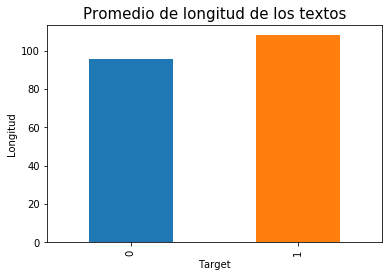

In [551]:
#grafico de promedio de longitud de los textos, por target
longitud_target_promedio= longitud_target.loc[:, 'longitud_text_mean']
longitud_target_promedio.plot(kind = 'bar')
plt.title('Promedio de longitud de los textos', size=15)
plt.xlabel('Target')
plt.ylabel('Longitud')

Text(0, 0.5, 'Cantidad')

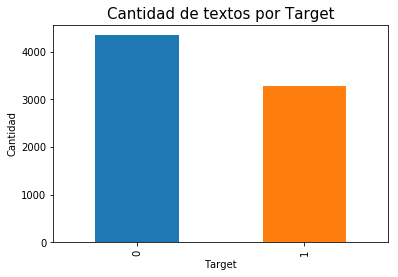

In [552]:
#grafico de cantidad de los textos, por target
longitud_target_cantidad= longitud_target.loc[:, 'longitud_text_count']
grafico=longitud_target_cantidad.plot(kind = 'bar')
plt.title('Cantidad de textos por Target', size=15)
plt.xlabel('Target')
plt.ylabel('Cantidad')

Text(0, 0.5, 'Keyword')

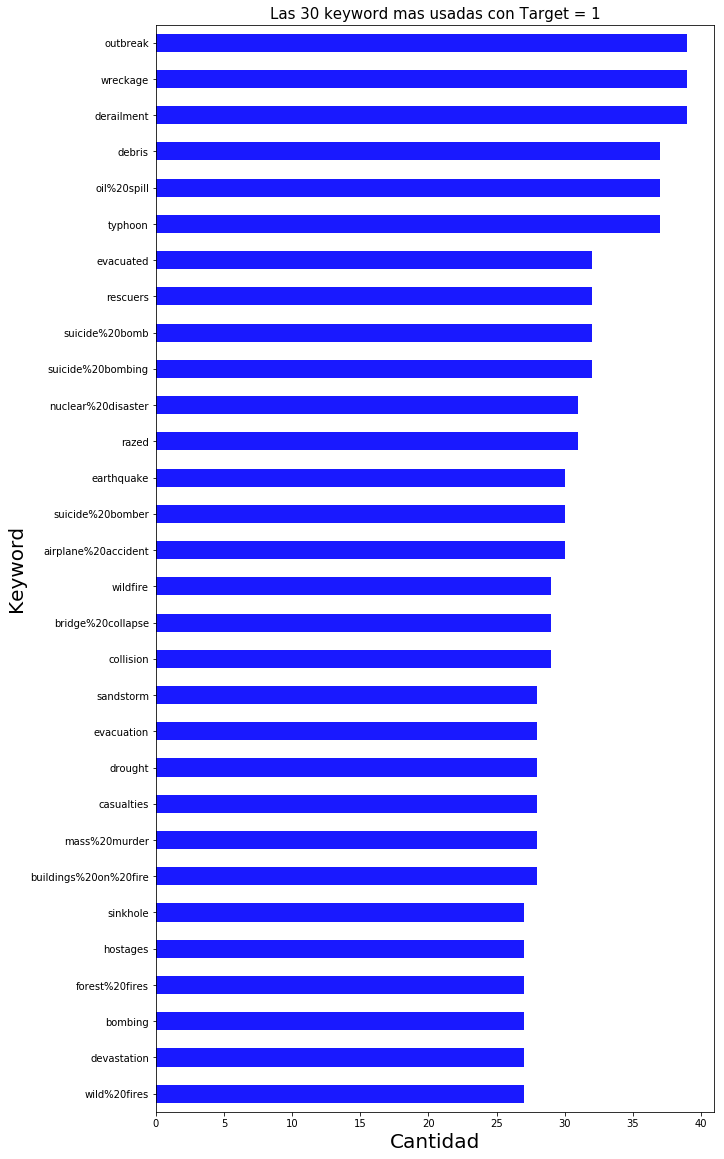

In [553]:
# Grafico con las primeras 30 keyword mas usadas de Target 1. 
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 1].value_counts().sort_values().tail(30)\
        .plot(kind='barh', alpha=0.9, color='blue')
plt.title("Las 30 keyword mas usadas con Target = 1",size=15)
plt.xlabel('Cantidad', size=20)
plt.ylabel('Keyword',size=20)

Text(0, 0.5, 'Keyword')

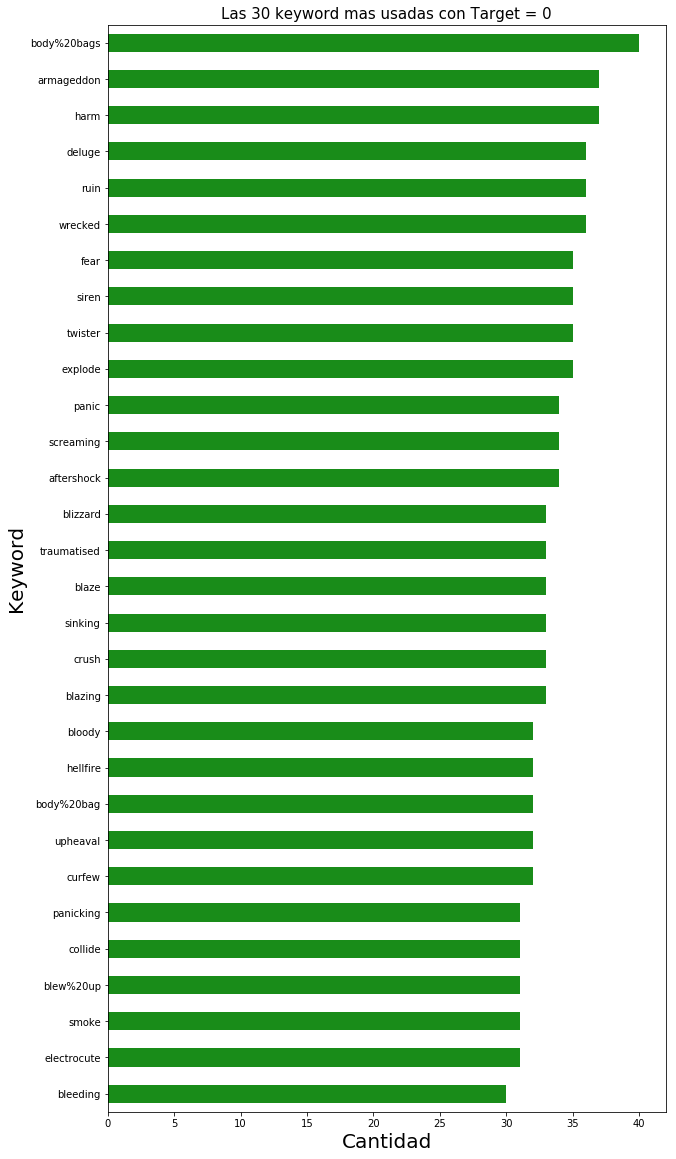

In [554]:
# Grafico con las primeras 30 keyword mas usadas de Target 0. 
plt.figure(figsize=(10, 20)) 
entrenamiento_df.keyword[entrenamiento_df.target == 0].value_counts().sort_values().tail(30)\
        .plot(kind='barh', alpha=0.9, color='green')
plt.title("Las 30 keyword mas usadas con Target = 0",size=15)
plt.xlabel('Cantidad', size=20)
plt.ylabel('Keyword',size=20)

In [555]:
#quito los 'NaN' en las columnas 'location','target'
location_target = pd.DataFrame(entrenamiento_df,columns=['location','target'])
location_target =location_target.dropna()
location_target.head(30)

,location,target
31,Birmingham,1
32,Est. September 2012 - Bristol,0
33,AFRICA,1
34,"Philadelphia, PA",0
35,"London, UK",0
36,Pretoria,0
37,World Wide!!,1
39,Paranaque City,0
40,Live On Webcam,0
42,milky way,0


Text(0, 0.5, 'location')

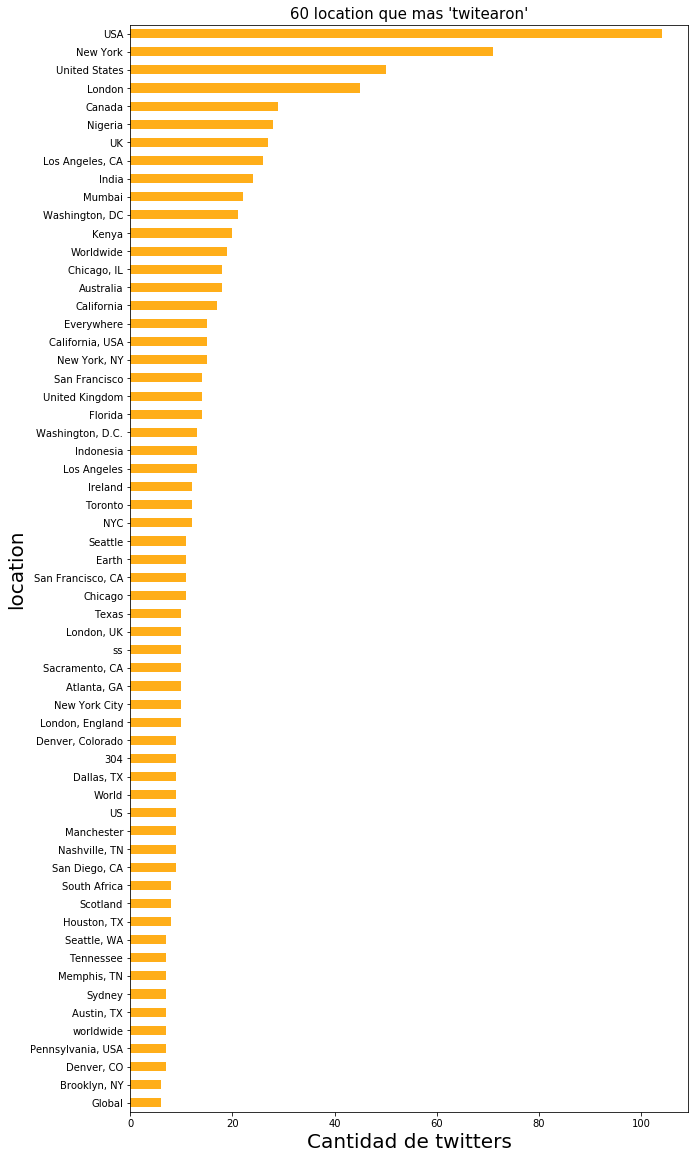

In [568]:
# Grafico con las primeras 60 location que mas twittearon. 
plt.figure(figsize=(10, 20)) 
location_target['location'].value_counts().sort_values().tail(60)\
        .plot(kind='barh', alpha=0.9, color='orange')
plt.title("60 location que mas 'twitearon'",size=15)
plt.xlabel('Cantidad de twitters', size=20)
plt.ylabel('location',size=20)

### Cantidad de tweets verdaderos y totales segun si tienen o no una localidad

In [77]:
# Divido el data frame entre los que tienen localidad y los que no
df_con_localidad = entrenamiento_df[entrenamiento_df['location'].fillna(0) != 0].copy()
df_sin_localidad = entrenamiento_df[entrenamiento_df['location'].fillna(0) == 0].copy()

In [78]:
df_con_localidad.count()

id          5080
keyword     5080
location    5080
text        5080
target      5080
dtype: int64

In [79]:
df_sin_localidad.count()

id          2533
keyword     2472
location       0
text        2533
target      2533
dtype: int64

In [80]:
df_con_localidad.loc[:,'location'] = 'Con localidad'
df_sin_localidad.loc[:,'location'] = 'Sin localidad'

In [81]:
df_localidades = df_con_localidad.append(df_sin_localidad)
df_localidades = df_localidades.groupby('location')['target'].agg(['sum','count'])
df_localidades.columns = ['verdaderos','totales']
df_localidades['falsos'] = df_localidades['totales'] - df_localidades['verdaderos']
df_localidades.head()

,verdaderos,totales,falsos
location,,,
Con localidad,2196,5080,2884
Sin localidad,1075,2533,1458


Text(0,0.5,'Cantidad de tweets')

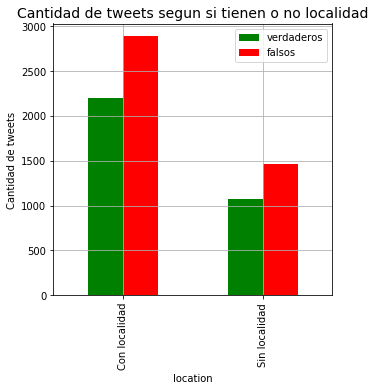

In [85]:
grafico = df_localidades.loc[:,['verdaderos','falsos']].plot(kind='bar', grid=True, figsize=(5,5), color=['green','red'])
grafico.set_title('Cantidad de tweets segun si tienen o no localidad', fontsize=14)
grafico.set_ylabel('Cantidad de tweets')

### Largo del texto segun las 5 localidades en los que se registraron más tweets verdaderos

In [68]:
df_localidad = entrenamiento_df.groupby('location').agg({'target':['sum','count']})
df_localidad.columns = ['verdaderos','totales']
df_localidad = df_localidad.sort_values('totales', ascending=False)
df_localidad.head()

,verdaderos,totales
location,,
USA,67,104
New York,16,71
United States,27,50
London,16,45
Canada,13,29


In [69]:
df_localidad['falsos'] = df_localidad['totales'] - df_localidad['verdaderos']
del df_localidad['totales']
df_localidad.head()

,verdaderos,falsos
location,,
USA,67,37
New York,16,55
United States,27,23
London,16,29
Canada,13,16


In [70]:
# Me quedo con los 5 de mayor cantidad
localidades = df_localidad.sort_values('verdaderos', ascending=False).reset_index().loc[0:4,'location']
localidades

0              USA
1    United States
2          Nigeria
3            India
4           Mumbai
Name: location, dtype: object

In [71]:
df_lugares_verdaderos = entrenamiento_df[entrenamiento_df['location'].isin(localidades)].copy()
df_lugares_verdaderos.shape

(228, 5)

In [72]:
df_lugares_verdaderos['longitud'] = df_lugares_verdaderos['text'].agg(lambda x: len(x))
df_lugares_verdaderos = df_lugares_verdaderos.groupby(['longitud','location'])\
    .agg({'longitud':['count']}).reset_index()
df_lugares_verdaderos.columns = ['longitud','location','cantidad']
df_lugares_verdaderos.head()

,longitud,location,cantidad
0,24,United States,1
1,34,United States,1
2,38,United States,1
3,41,United States,1
4,53,Nigeria,1


In [73]:
# Agrupo las longitudes en grupos de 10
df_lugares_verdaderos['grupo'] = df_lugares_verdaderos['longitud'].agg(lambda x: int(x/10)*10)
df_lugares_verdaderos.head()

,longitud,location,cantidad,grupo
0,24,United States,1,20
1,34,United States,1,30
2,38,United States,1,30
3,41,United States,1,40
4,53,Nigeria,1,50


In [74]:
df_lugares_verdaderos = df_lugares_verdaderos.groupby(['grupo','location'])['cantidad']\
                                            .agg('sum').reset_index()
df_lugares_verdaderos.head()

,grupo,location,cantidad
0,20,United States,1
1,30,United States,2
2,40,United States,1
3,50,Nigeria,1
4,50,USA,1


In [75]:
df_lugares_verdaderos = pd.pivot_table(df_lugares_verdaderos, index='grupo', columns='location', values='cantidad', fill_value=0)

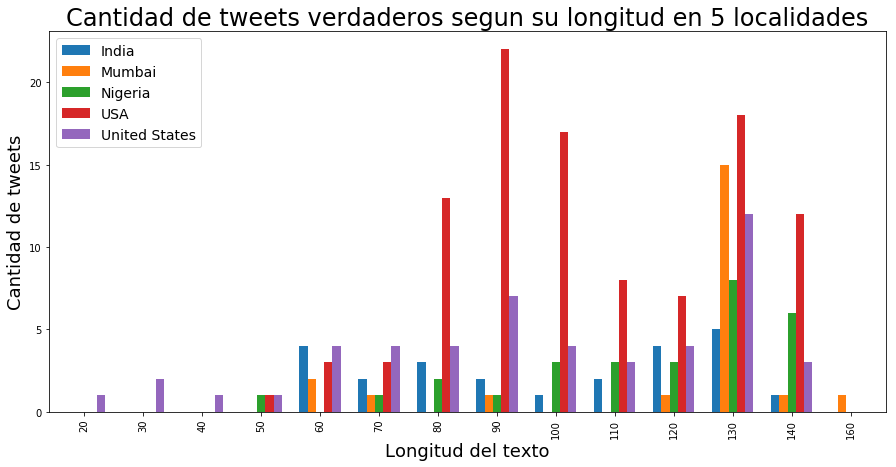

In [76]:
grafico = df_lugares_verdaderos.plot(kind='bar', figsize=(15,7), width=0.7)
grafico.set_title('Cantidad de tweets verdaderos segun su longitud en 5 localidades',fontsize=24)
grafico.set_xlabel('Longitud del texto',fontsize=18)
grafico.set_ylabel('Cantidad de tweets',fontsize=18)
grafico.legend(fontsize=14)